# **Handling Missing Values Columns**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GUVI FINAL PROJRCT/after_sort_step_1.csv')



```
# Note : Now we gonna find CPI , Unemployment and markdown columns  with the features of store,dept,type,size,temperature,fuel_price,isholiday
```


# **Best Algorithm Selection Method**

In [ ]:
def model_regression(xtrain,xtest,ytrain,ytest,algorithm):

  for i in algorithm:

    model = i().fit(xtrain,ytrain)

    # predict for train and test accuracy

    y_train_pred = model.predict(xtrain)

    y_test_pred  = model.predict(xtest)

    # R2 score

    r2_training = r2_score(ytrain,y_train_pred)

    r2_testing = r2_score(ytest,y_test_pred)

    data = {'Algorithm':i.__name__, 'Training R2 Score':r2_training,'Testing R2 Score':r2_testing}

    print(data)


# **Markdown Columns**


**Total Null Values In Markdown**

In [ ]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales    129909
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
dtype: int64

In [ ]:
df = df[['Store', 'Dept','IsHoliday', 'Temperature',
       'Fuel_Price','Day', 'Month', 'Year', 'Type',
       'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales']]

In [ ]:
df.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day',
       'Month', 'Year', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales'],
      dtype='object')

## **Markdown 1**

In [ ]:
mark_1 = df.drop(['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],axis=1)

mark_1

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02


In [ ]:
mark_1.isnull().sum()

Store               0
Dept                0
IsHoliday           0
Temperature         0
Fuel_Price          0
Day                 0
Month               0
Year                0
Type                0
Size                0
MarkDown1      271074
dtype: int64

**Null Values DF**

In [ ]:
mark_1_null = mark_1[mark_1.isnull().any(axis=1)]

mark_1_null.to_csv('mark1_null.csv',index=False)

In [ ]:
mark_1_null.isnull().sum()

Store               0
Dept                0
IsHoliday           0
Temperature         0
Fuel_Price          0
Day                 0
Month               0
Year                0
Type                0
Size                0
MarkDown1      271074
dtype: int64

**Non Null Values**

In [ ]:
mark_1_null

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551277,42,94,0,83.32,3.865,26,7,2013,3,39690,NaN
551278,42,95,0,83.32,3.865,26,7,2013,3,39690,NaN
551279,42,96,0,83.32,3.865,26,7,2013,3,39690,NaN
551280,42,97,0,83.32,3.865,26,7,2013,3,39690,NaN


In [ ]:
mark_1_nn = mark_1.dropna()

mark_1_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
270138,1,1,0,59.11,3.297,11,11,2011,1,151315,10382.90
270139,1,2,0,59.11,3.297,11,11,2011,1,151315,10382.90
270140,1,3,0,59.11,3.297,11,11,2011,1,151315,10382.90
270141,1,4,0,59.11,3.297,11,11,2011,1,151315,10382.90
270142,1,5,0,59.11,3.297,11,11,2011,1,151315,10382.90
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02


In [ ]:
x = mark_1_nn.drop('MarkDown1',axis=1)
y = mark_1_nn['MarkDown1']

In [ ]:
x.shape,y.shape

((280405, 10), (280405,))

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.9999999505672168}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9999999845926717, 'Testing R2 Score': 0.9999998789057053}




```
# Note : Here We Choose RandomForestRegressor
```




In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

In [ ]:
null_df = pd.read_csv('/content/mark1_null.csv')

In [ ]:
null_df.isnull().sum()

Store               0
Dept                0
IsHoliday           0
Temperature         0
Fuel_Price          0
Day                 0
Month               0
Year                0
Type                0
Size                0
MarkDown1      271074
dtype: int64

In [ ]:
predicted_mark_1 = model.predict(null_df.drop('MarkDown1',axis=1))

result = pd.concat([mark_1_nn, null_df], axis=0,ignore_index=True)

In [ ]:
predicted_mark_1

array([7422.4664, 7422.4664, 7422.4664, ...,   66.8616,   66.8616,
         66.8616])

In [ ]:
null_df.drop('MarkDown1',axis=1,inplace=True)

In [ ]:
null_df['MarkDown1'] = predicted_mark_1

In [ ]:
mark_1_nn


,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
270138,1,1,0,59.11,3.297,11,11,2011,1,151315,10382.90
270139,1,2,0,59.11,3.297,11,11,2011,1,151315,10382.90
270140,1,3,0,59.11,3.297,11,11,2011,1,151315,10382.90
270141,1,4,0,59.11,3.297,11,11,2011,1,151315,10382.90
270142,1,5,0,59.11,3.297,11,11,2011,1,151315,10382.90
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02


In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664
...,...,...,...,...,...,...,...,...,...,...,...
271069,42,94,0,83.32,3.865,26,7,2013,3,39690,66.8616
271070,42,95,0,83.32,3.865,26,7,2013,3,39690,66.8616
271071,42,96,0,83.32,3.865,26,7,2013,3,39690,66.8616
271072,42,97,0,83.32,3.865,26,7,2013,3,39690,66.8616


In [ ]:
result = pd.concat([mark_1_nn, null_df], axis=0,ignore_index=True)

In [ ]:
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1
0,1,1,0,59.11,3.297,11,11,2011,1,151315,10382.9000
1,1,2,0,59.11,3.297,11,11,2011,1,151315,10382.9000
2,1,3,0,59.11,3.297,11,11,2011,1,151315,10382.9000
3,1,4,0,59.11,3.297,11,11,2011,1,151315,10382.9000
4,1,5,0,59.11,3.297,11,11,2011,1,151315,10382.9000
...,...,...,...,...,...,...,...,...,...,...,...
551474,42,94,0,83.32,3.865,26,7,2013,3,39690,66.8616
551475,42,95,0,83.32,3.865,26,7,2013,3,39690,66.8616
551476,42,96,0,83.32,3.865,26,7,2013,3,39690,66.8616
551477,42,97,0,83.32,3.865,26,7,2013,3,39690,66.8616


In [ ]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

merged_dataset = df.merge(result, on=merge_columns, how='left')

merged_dataset

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1_x,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,MarkDown1_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,24924.50,7422.4664
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,50605.27,7422.4664
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,13740.12,7422.4664
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,39954.04,7422.4664
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,32229.38,7422.4664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,212.0200
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,212.0200
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,212.0200
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,212.0200


In [ ]:
df['MarkDown1'] = merged_dataset['MarkDown1_y']

In [ ]:
df.isnull().sum()

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
Weekly_Sales    129909
dtype: int64

In [ ]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,NaN,NaN,NaN,NaN,211.096358,8.106,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,NaN,NaN,NaN,NaN,211.096358,8.106,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,NaN,NaN,NaN,NaN,211.096358,8.106,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,NaN,NaN,NaN,NaN,211.096358,8.106,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,NaN,NaN,NaN,NaN,211.096358,8.106,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN


## **Markdown 2**

In [ ]:
mark_2 = df.drop(['Weekly_Sales','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],axis=1)

mark_2

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown2
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,851.73
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,851.73
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,851.73
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,851.73


In [ ]:
mark_2_null = mark_2[mark_2.isnull().any(axis=1)]

mark_2_null.to_csv('mark2_null.csv',index=False)

mark_2_nn = mark_2.dropna()

x = mark_2_nn.drop('MarkDown2',axis=1)

y = mark_2_nn['MarkDown2']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
mark_2_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown2
270138,1,1,0,59.11,3.297,11,11,2011,1,151315,6115.67
270139,1,2,0,59.11,3.297,11,11,2011,1,151315,6115.67
270140,1,3,0,59.11,3.297,11,11,2011,1,151315,6115.67
270141,1,4,0,59.11,3.297,11,11,2011,1,151315,6115.67
270142,1,5,0,59.11,3.297,11,11,2011,1,151315,6115.67
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,851.73
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,851.73
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,851.73
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,851.73


In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.9999999645706132}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9999999999998535, 'Testing R2 Score': 0.9999999999994333}


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/mark2_null.csv')

# prediction

predicted_mark_2 = model.predict(null_df.drop('MarkDown2',axis=1))

null_df.drop('MarkDown2',axis=1,inplace=True)

null_df['MarkDown2'] = predicted_mark_2

In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown2
0,1,1,0,42.31,2.572,5,2,2010,1,151315,6443.322
1,1,2,0,42.31,2.572,5,2,2010,1,151315,6443.322
2,1,3,0,42.31,2.572,5,2,2010,1,151315,6443.322
3,1,4,0,42.31,2.572,5,2,2010,1,151315,6443.322
4,1,5,0,42.31,2.572,5,2,2010,1,151315,6443.322
...,...,...,...,...,...,...,...,...,...,...,...
343577,44,95,0,83.62,3.669,26,7,2013,3,39910,100.610
343578,44,96,0,83.62,3.669,26,7,2013,3,39910,100.610
343579,44,97,0,83.62,3.669,26,7,2013,3,39910,100.610
343580,44,98,0,83.62,3.669,26,7,2013,3,39910,100.610


In [ ]:
result = pd.concat([mark_2_nn, null_df], axis=0,ignore_index=True)

In [ ]:
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown2
0,1,1,0,59.11,3.297,11,11,2011,1,151315,6115.67
1,1,2,0,59.11,3.297,11,11,2011,1,151315,6115.67
2,1,3,0,59.11,3.297,11,11,2011,1,151315,6115.67
3,1,4,0,59.11,3.297,11,11,2011,1,151315,6115.67
4,1,5,0,59.11,3.297,11,11,2011,1,151315,6115.67
...,...,...,...,...,...,...,...,...,...,...,...
551474,44,95,0,83.62,3.669,26,7,2013,3,39910,100.61
551475,44,96,0,83.62,3.669,26,7,2013,3,39910,100.61
551476,44,97,0,83.62,3.669,26,7,2013,3,39910,100.61
551477,44,98,0,83.62,3.669,26,7,2013,3,39910,100.61


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

merged_dataset = df.merge(result, on=merge_columns, how='left')

merged_dataset

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2_x,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,MarkDown2_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,NaN,NaN,NaN,NaN,211.096358,8.106,24924.50,6443.322
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,NaN,NaN,NaN,NaN,211.096358,8.106,50605.27,6443.322
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,NaN,NaN,NaN,NaN,211.096358,8.106,13740.12,6443.322
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,NaN,NaN,NaN,NaN,211.096358,8.106,39954.04,6443.322
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,NaN,NaN,NaN,NaN,211.096358,8.106,32229.38,6443.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,851.730
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,851.730
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,851.730
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,851.730


In [ ]:
df['MarkDown2'] = merged_dataset['MarkDown2_y']

print(df.isnull().sum())

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
Weekly_Sales    129909
dtype: int64


## **Markdown 3**

In [ ]:
mark_3 = df.drop(['Weekly_Sales','MarkDown1','MarkDown2','MarkDown4','MarkDown5','CPI','Unemployment'],axis=1)

mark_3

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown3
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,2.06
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,2.06
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,2.06
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,2.06


In [ ]:
mark_3_null = mark_3[mark_3.isnull().any(axis=1)]

mark_3_null.to_csv('mark3_null.csv',index=False)

mark_3_nn = mark_3.dropna()

x = mark_3_nn.drop('MarkDown3',axis=1)

y = mark_3_nn['MarkDown3']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.9999999999898673}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9999999999995318, 'Testing R2 Score': 0.9999999999977113}


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/mark3_null.csv')

# prediction

predicted_mark_3 = model.predict(null_df.drop('MarkDown3',axis=1))

null_df.drop('MarkDown3',axis=1,inplace=True)

null_df['MarkDown3'] = predicted_mark_3


In [ ]:
mark_3_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown3
270138,1,1,0,59.11,3.297,11,11,2011,1,151315,215.07
270139,1,2,0,59.11,3.297,11,11,2011,1,151315,215.07
270140,1,3,0,59.11,3.297,11,11,2011,1,151315,215.07
270141,1,4,0,59.11,3.297,11,11,2011,1,151315,215.07
270142,1,5,0,59.11,3.297,11,11,2011,1,151315,215.07
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,2.06
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,2.06
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,2.06
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,2.06


In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown3
0,1,1,0,42.31,2.572,5,2,2010,1,151315,145.5875
1,1,2,0,42.31,2.572,5,2,2010,1,151315,145.5875
2,1,3,0,42.31,2.572,5,2,2010,1,151315,145.5875
3,1,4,0,42.31,2.572,5,2,2010,1,151315,145.5875
4,1,5,0,42.31,2.572,5,2,2010,1,151315,145.5875
...,...,...,...,...,...,...,...,...,...,...,...
296855,37,95,0,83.28,3.620,26,7,2013,3,39910,1.0340
296856,37,96,0,83.28,3.620,26,7,2013,3,39910,1.0340
296857,37,97,0,83.28,3.620,26,7,2013,3,39910,1.0340
296858,37,98,0,83.28,3.620,26,7,2013,3,39910,1.0340


In [ ]:
result = pd.concat([mark_3_nn, null_df], axis=0,ignore_index=True)

In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

md = df.merge(result, on=merge_columns, how='left')

md

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3_x,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,MarkDown3_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,NaN,NaN,NaN,211.096358,8.106,24924.50,145.5875
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,NaN,NaN,NaN,211.096358,8.106,50605.27,145.5875
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,NaN,NaN,NaN,211.096358,8.106,13740.12,145.5875
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,NaN,NaN,NaN,211.096358,8.106,39954.04,145.5875
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,NaN,NaN,NaN,211.096358,8.106,32229.38,145.5875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.06,10.88,1864.57,NaN,NaN,NaN,2.0600
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.06,10.88,1864.57,NaN,NaN,NaN,2.0600
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.06,10.88,1864.57,NaN,NaN,NaN,2.0600
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.06,10.88,1864.57,NaN,NaN,NaN,2.0600


In [ ]:
df['MarkDown3'] = md['MarkDown3_y']

print(df.isnull().sum())

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
Weekly_Sales    129909
dtype: int64


## **Markdown 4**

In [ ]:
mark_4 = df.drop(['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown5','CPI','Unemployment'],axis=1)

mark_4

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown4
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,10.88
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,10.88
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,10.88
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,10.88


In [ ]:
mark_4_null = mark_4[mark_4.isnull().any(axis=1)]

mark_4_null.to_csv('mark4_null.csv',index=False)

mark_4_nn = mark_4.dropna()

x = mark_4_nn.drop('MarkDown4',axis=1)
y = mark_4_nn['MarkDown4']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
mark_4_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown4
270138,1,1,0,59.11,3.297,11,11,2011,1,151315,2406.62
270139,1,2,0,59.11,3.297,11,11,2011,1,151315,2406.62
270140,1,3,0,59.11,3.297,11,11,2011,1,151315,2406.62
270141,1,4,0,59.11,3.297,11,11,2011,1,151315,2406.62
270142,1,5,0,59.11,3.297,11,11,2011,1,151315,2406.62
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,10.88
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,10.88
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,10.88
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,10.88


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/mark4_null.csv')

# prediction

predicted_mark_4 = model.predict(null_df.drop('MarkDown4',axis=1))

null_df.drop('MarkDown4',axis=1,inplace=True)

null_df['MarkDown4'] = predicted_mark_4

null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown4
0,1,1,0,42.31,2.572,5,2,2010,1,151315,25656.6681
1,1,2,0,42.31,2.572,5,2,2010,1,151315,25656.6681
2,1,3,0,42.31,2.572,5,2,2010,1,151315,25656.6681
3,1,4,0,42.31,2.572,5,2,2010,1,151315,25656.6681
4,1,5,0,42.31,2.572,5,2,2010,1,151315,25656.6681
...,...,...,...,...,...,...,...,...,...,...,...
302825,44,95,0,83.62,3.669,26,7,2013,3,39910,38.6905
302826,44,96,0,83.62,3.669,26,7,2013,3,39910,38.6905
302827,44,97,0,83.62,3.669,26,7,2013,3,39910,38.6905
302828,44,98,0,83.62,3.669,26,7,2013,3,39910,38.6905


In [ ]:
result = pd.concat([mark_4_nn, null_df], axis=0,ignore_index=True)

result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown4
0,1,1,0,59.11,3.297,11,11,2011,1,151315,2406.6200
1,1,2,0,59.11,3.297,11,11,2011,1,151315,2406.6200
2,1,3,0,59.11,3.297,11,11,2011,1,151315,2406.6200
3,1,4,0,59.11,3.297,11,11,2011,1,151315,2406.6200
4,1,5,0,59.11,3.297,11,11,2011,1,151315,2406.6200
...,...,...,...,...,...,...,...,...,...,...,...
551474,44,95,0,83.62,3.669,26,7,2013,3,39910,38.6905
551475,44,96,0,83.62,3.669,26,7,2013,3,39910,38.6905
551476,44,97,0,83.62,3.669,26,7,2013,3,39910,38.6905
551477,44,98,0,83.62,3.669,26,7,2013,3,39910,38.6905


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

md_1 = df.merge(result, on=merge_columns, how='left')

md_1

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4_x,MarkDown5,CPI,Unemployment,Weekly_Sales,MarkDown4_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,24924.50,16721.9869
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,50605.27,16721.9869
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,13740.12,16721.9869
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,39954.04,16721.9869
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,32229.38,16721.9869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,10.8800
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,10.8800
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,10.8800
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,NaN,10.8800


In [ ]:
df['MarkDown4'] = md_1['MarkDown4_y']

print(df.isnull().sum())

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5       270138
CPI              43303
Unemployment     43303
Weekly_Sales    129909
dtype: int64


## **Markdown 5**

In [ ]:
mark_5 = df.drop(['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'],axis=1)

mark_5

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown5
0,1,1,0,42.31,2.572,5,2,2010,1,151315,NaN
1,1,2,0,42.31,2.572,5,2,2010,1,151315,NaN
2,1,3,0,42.31,2.572,5,2,2010,1,151315,NaN
3,1,4,0,42.31,2.572,5,2,2010,1,151315,NaN
4,1,5,0,42.31,2.572,5,2,2010,1,151315,NaN
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,1864.57
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,1864.57
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,1864.57
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,1864.57


In [ ]:
mark_5_null = mark_5[mark_5.isnull().any(axis=1)]

mark_5_null.to_csv('mark5_null.csv',index=False)

mark_5_nn = mark_5.dropna()

x = mark_5_nn.drop('MarkDown5',axis=1)
y = mark_5_nn['MarkDown5']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.9999999988379903}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}


In [ ]:
mark_5_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown5
270138,1,1,0,59.11,3.297,11,11,2011,1,151315,6551.42
270139,1,2,0,59.11,3.297,11,11,2011,1,151315,6551.42
270140,1,3,0,59.11,3.297,11,11,2011,1,151315,6551.42
270141,1,4,0,59.11,3.297,11,11,2011,1,151315,6551.42
270142,1,5,0,59.11,3.297,11,11,2011,1,151315,6551.42
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,1864.57
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,1864.57
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,1864.57
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,1864.57


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/mark5_null.csv')

# prediction

predicted_mark_5 = model.predict(null_df.drop('MarkDown5',axis=1))

null_df.drop('MarkDown5',axis=1,inplace=True)

null_df['MarkDown5'] = predicted_mark_5

result = pd.concat([mark_5_nn, null_df], axis=0,ignore_index=True)

result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown5
0,1,1,0,59.11,3.297,11,11,2011,1,151315,6551.420
1,1,2,0,59.11,3.297,11,11,2011,1,151315,6551.420
2,1,3,0,59.11,3.297,11,11,2011,1,151315,6551.420
3,1,4,0,59.11,3.297,11,11,2011,1,151315,6551.420
4,1,5,0,59.11,3.297,11,11,2011,1,151315,6551.420
...,...,...,...,...,...,...,...,...,...,...,...
551474,45,93,0,43.92,3.551,4,11,2011,2,118221,3340.816
551475,45,94,0,43.92,3.551,4,11,2011,2,118221,3340.816
551476,45,95,0,43.92,3.551,4,11,2011,2,118221,3340.816
551477,45,97,0,43.92,3.551,4,11,2011,2,118221,3340.816


In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown5
0,1,1,0,42.31,2.572,5,2,2010,1,151315,4489.6821
1,1,2,0,42.31,2.572,5,2,2010,1,151315,4489.6821
2,1,3,0,42.31,2.572,5,2,2010,1,151315,4489.6821
3,1,4,0,42.31,2.572,5,2,2010,1,151315,4489.6821
4,1,5,0,42.31,2.572,5,2,2010,1,151315,4489.6821
...,...,...,...,...,...,...,...,...,...,...,...
270133,45,93,0,43.92,3.551,4,11,2011,2,118221,3340.8160
270134,45,94,0,43.92,3.551,4,11,2011,2,118221,3340.8160
270135,45,95,0,43.92,3.551,4,11,2011,2,118221,3340.8160
270136,45,97,0,43.92,3.551,4,11,2011,2,118221,3340.8160


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

md = df.merge(result, on=merge_columns, how='left')

md

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5_x,CPI,Unemployment,Weekly_Sales,MarkDown5_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,22180.6735,NaN,211.096358,8.106,24924.50,4489.6821
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,22180.6735,NaN,211.096358,8.106,50605.27,4489.6821
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,22180.6735,NaN,211.096358,8.106,13740.12,4489.6821
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,22180.6735,NaN,211.096358,8.106,39954.04,4489.6821
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,22180.6735,NaN,211.096358,8.106,32229.38,4489.6821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.57,NaN,NaN,NaN,1864.5700
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.57,NaN,NaN,NaN,1864.5700
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.57,NaN,NaN,NaN,1864.5700
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.57,NaN,NaN,NaN,1864.5700


In [ ]:
df['MarkDown5'] = md['MarkDown5_y']

print(df.isnull().sum())

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI              43303
Unemployment     43303
Weekly_Sales    129909
dtype: int64


# **CPI Column**

In [ ]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,NaN,NaN,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,NaN,NaN,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,NaN,NaN,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,NaN,NaN,NaN


In [ ]:
cpi = df.drop(['Weekly_Sales','Unemployment'],axis=1)

cpi

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,NaN


In [ ]:
cpi_null = cpi[cpi.isnull().any(axis=1)]

cpi_null.to_csv('cpi_null.csv',index=False)

cpi_nn = cpi.dropna()

x = cpi_nn.drop('CPI',axis=1)
y = cpi_nn['CPI']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
cpi_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508171,45,94,0,50.64,3.615,26,4,2013,2,118221,1260.6500,385.348,57.5200,40.5100,2476.1800,193.589304
508172,45,95,0,50.64,3.615,26,4,2013,2,118221,1260.6500,385.348,57.5200,40.5100,2476.1800,193.589304
508173,45,96,0,50.64,3.615,26,4,2013,2,118221,1260.6500,385.348,57.5200,40.5100,2476.1800,193.589304
508174,45,97,0,50.64,3.615,26,4,2013,2,118221,1260.6500,385.348,57.5200,40.5100,2476.1800,193.589304


In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/cpi_null.csv')

# prediction

predicted_cpi = model.predict(null_df.drop('CPI',axis=1))

null_df.drop('CPI',axis=1,inplace=True)

null_df['CPI'] = predicted_cpi

null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
0,1,1,0,66.66,3.386,3,5,2013,1,151315,2298.63,2.00,129.90,55.46,1301.04,225.163470
1,1,2,0,66.66,3.386,3,5,2013,1,151315,2298.63,2.00,129.90,55.46,1301.04,225.163470
2,1,3,0,66.66,3.386,3,5,2013,1,151315,2298.63,2.00,129.90,55.46,1301.04,225.163470
3,1,4,0,66.66,3.386,3,5,2013,1,151315,2298.63,2.00,129.90,55.46,1301.04,225.163470
4,1,5,0,66.66,3.386,3,5,2013,1,151315,2298.63,2.00,129.90,55.46,1301.04,225.163470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43298,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,193.267465
43299,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,193.267465
43300,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,193.267465
43301,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,193.267465


In [ ]:
result = pd.concat([cpi_nn, null_df], axis=0,ignore_index=True)

result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

md = df.merge(result, on=merge_columns, how='left')

md

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,...,MarkDown5_x,CPI_x,Unemployment,Weekly_Sales,MarkDown1_y,MarkDown2_y,MarkDown3_y,MarkDown4_y,MarkDown5_y,CPI_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,...,4489.6821,211.096358,8.106,24924.50,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
1,1,2,0,42.31,2.572,5,2,2010,1,151315,...,4489.6821,211.096358,8.106,50605.27,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
2,1,3,0,42.31,2.572,5,2,2010,1,151315,...,4489.6821,211.096358,8.106,13740.12,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
3,1,4,0,42.31,2.572,5,2,2010,1,151315,...,4489.6821,211.096358,8.106,39954.04,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
4,1,5,0,42.31,2.572,5,2,2010,1,151315,...,4489.6821,211.096358,8.106,32229.38,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,...,1864.5700,NaN,NaN,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,...,1864.5700,NaN,NaN,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,...,1864.5700,NaN,NaN,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,...,1864.5700,NaN,NaN,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465


In [ ]:
df['CPI'] = md['CPI_y']

print(df.isnull().sum())

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment     43303
Weekly_Sales    129909
dtype: int64


# **Unemployment Column**

In [ ]:
unemployment = df.drop(['Weekly_Sales'],axis=1)

unemployment

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,NaN


In [ ]:
unemployment_null = unemployment[unemployment.isnull().any(axis=1)]

unemployment_null.to_csv('unemployment_null.csv',index=False)

unemployment_nn = unemployment.dropna()

x = unemployment_nn.drop('Unemployment',axis=1)

y = unemployment_nn['Unemployment']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
unemployment_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508171,45,94,0,50.64,3.615,26,4,2013,2,118221,1260.6500,385.348,57.5200,40.5100,2476.1800,193.589304,8.335
508172,45,95,0,50.64,3.615,26,4,2013,2,118221,1260.6500,385.348,57.5200,40.5100,2476.1800,193.589304,8.335
508173,45,96,0,50.64,3.615,26,4,2013,2,118221,1260.6500,385.348,57.5200,40.5100,2476.1800,193.589304,8.335
508174,45,97,0,50.64,3.615,26,4,2013,2,118221,1260.6500,385.348,57.5200,40.5100,2476.1800,193.589304,8.335


In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 1.0}


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/unemployment_null.csv')

In [ ]:
predicted_Unemployment = model.predict(null_df.drop('Unemployment',axis=1))

null_df.drop('Unemployment',axis=1,inplace=True)

null_df['Unemployment'] = predicted_Unemployment

In [ ]:
null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,0,66.66,3.386,3,5,2013,1,151315,2298.63,2.00,129.90,55.46,1301.04,225.163470,6.31400
1,1,2,0,66.66,3.386,3,5,2013,1,151315,2298.63,2.00,129.90,55.46,1301.04,225.163470,6.31400
2,1,3,0,66.66,3.386,3,5,2013,1,151315,2298.63,2.00,129.90,55.46,1301.04,225.163470,6.31400
3,1,4,0,66.66,3.386,3,5,2013,1,151315,2298.63,2.00,129.90,55.46,1301.04,225.163470,6.31400
4,1,5,0,66.66,3.386,3,5,2013,1,151315,2298.63,2.00,129.90,55.46,1301.04,225.163470,6.31400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43298,45,94,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,193.267465,8.67499
43299,45,95,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,193.267465,8.67499
43300,45,96,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,193.267465,8.67499
43301,45,97,0,76.06,3.804,26,7,2013,2,118221,212.02,851.73,2.06,10.88,1864.57,193.267465,8.67499


In [ ]:
result = pd.concat([unemployment_nn, null_df], axis=0,ignore_index=True)
result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

md = df.merge(result, on=merge_columns, how='left')

md

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,...,CPI_x,Unemployment_x,Weekly_Sales,MarkDown1_y,MarkDown2_y,MarkDown3_y,MarkDown4_y,MarkDown5_y,CPI_y,Unemployment_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,...,211.096358,8.106,24924.50,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600
1,1,2,0,42.31,2.572,5,2,2010,1,151315,...,211.096358,8.106,50605.27,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600
2,1,3,0,42.31,2.572,5,2,2010,1,151315,...,211.096358,8.106,13740.12,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600
3,1,4,0,42.31,2.572,5,2,2010,1,151315,...,211.096358,8.106,39954.04,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600
4,1,5,0,42.31,2.572,5,2,2010,1,151315,...,211.096358,8.106,32229.38,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,...,193.267465,NaN,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,...,193.267465,NaN,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,...,193.267465,NaN,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,...,193.267465,NaN,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499


In [ ]:
df['Unemployment'] = md['Unemployment_y']

print(df.isnull().sum())

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
Weekly_Sales    129909
dtype: int64


# **Weekly Sales**

In [ ]:
df.isnull().sum()

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
Weekly_Sales    129909
dtype: int64

In [ ]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,NaN


In [ ]:
df['Weekly_Sales'].min(),df['Weekly_Sales'].max()

(-4988.94, 693099.36)

In [ ]:
# Weekly value less than 1 then make it None

df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x : None if x<1 else x)

**Weekly Sales Before Prediction**

In [ ]:
df['Weekly_Sales'].min(),df['Weekly_Sales'].max()

(1.0, 693099.36)

In [ ]:
df.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day',
       'Month', 'Year', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales'],
      dtype='object')

In [ ]:
Weekly_sales = df.copy()

Weekly_sales

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,NaN
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,NaN
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,NaN
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,NaN


In [ ]:
Weekly_sales_null = Weekly_sales[Weekly_sales.isnull().any(axis=1)]

Weekly_sales_null.to_csv('Weekly_sales_null.csv',index=False)

Weekly_sales_nn = Weekly_sales.dropna()

x = Weekly_sales_nn.drop('Weekly_Sales',axis=1)

y = Weekly_sales_nn['Weekly_Sales']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9963942555251905, 'Testing R2 Score': 0.9726475596140494}


In [ ]:
Weekly_sales_nn

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106,24924.50
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106,50605.27
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106,13740.12
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106,39954.04
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.106,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,0,58.85,3.882,26,10,2012,2,118221,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2487.80
421566,45,94,0,58.85,3.882,26,10,2012,2,118221,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,5203.31
421567,45,95,0,58.85,3.882,26,10,2012,2,118221,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,56017.47
421568,45,97,0,58.85,3.882,26,10,2012,2,118221,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,6817.48


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/Weekly_sales_null.csv')

# prediction

predicted_Weekly_sales = model.predict(null_df.drop('Weekly_Sales',axis=1))

null_df.drop('Weekly_Sales',axis=1,inplace=True)

null_df['Weekly_Sales'] = predicted_Weekly_sales

null_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,6,47,0,40.43,2.572,5,2,2010,1,202505,7186.7572,4473.4696,75.4385,43312.0388,7429.7513,212.622352,7.25900,119.7900
1,9,49,0,38.01,2.572,5,2,2010,2,125833,5660.1110,1667.7348,61.5666,7187.9385,3717.1656,214.655459,6.41500,38.6014
2,11,19,0,46.04,2.572,5,2,2010,1,207499,10084.6331,4215.0500,95.8832,43360.6736,6884.5665,214.424881,7.36800,668.7009
3,15,80,0,19.83,2.954,5,2,2010,2,123737,6036.4555,13335.6603,75.8079,8749.5216,4668.2455,131.527903,8.35000,43.7630
4,20,19,0,25.92,2.784,5,2,2010,1,203742,10297.2846,5711.6382,36.6672,61759.7353,7182.4264,204.247194,8.18700,109.1172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131910,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.7300,2.0600,10.8800,1864.5700,193.267465,8.67499,4392.5763
131911,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.7300,2.0600,10.8800,1864.5700,193.267465,8.67499,56064.7318
131912,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.7300,2.0600,10.8800,1864.5700,193.267465,8.67499,1094.3121
131913,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.7300,2.0600,10.8800,1864.5700,193.267465,8.67499,6337.4919


In [ ]:
result = pd.concat([Weekly_sales_nn, null_df], axis=0,ignore_index=True)

result

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,24924.5000
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,50605.2700
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,13740.1200
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,39954.0400
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,32229.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,4392.5763
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,56064.7318
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,1094.3121
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,6337.4919


In [ ]:
merge_columns = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Day', 'Month', 'Year', 'Type', 'Size']

md = df.merge(result, on=merge_columns, how='left')

md

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,...,Unemployment_x,Weekly_Sales_x,MarkDown1_y,MarkDown2_y,MarkDown3_y,MarkDown4_y,MarkDown5_y,CPI_y,Unemployment_y,Weekly_Sales_y
0,1,1,0,42.31,2.572,5,2,2010,1,151315,...,8.10600,24924.50,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,24924.5000
1,1,2,0,42.31,2.572,5,2,2010,1,151315,...,8.10600,50605.27,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,50605.2700
2,1,3,0,42.31,2.572,5,2,2010,1,151315,...,8.10600,13740.12,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,13740.1200
3,1,4,0,42.31,2.572,5,2,2010,1,151315,...,8.10600,39954.04,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,39954.0400
4,1,5,0,42.31,2.572,5,2,2010,1,151315,...,8.10600,32229.38,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,32229.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,...,8.67499,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,4392.5763
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,...,8.67499,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,56064.7318
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,...,8.67499,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,1094.3121
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,...,8.67499,NaN,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,6337.4919


In [ ]:
df['Weekly_Sales'] = md['Weekly_Sales_y']

print(df.isnull().sum())

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
Day             0
Month           0
Year            0
Type            0
Size            0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Weekly_Sales    0
dtype: int64


 **Weekly sales After prediction**

In [ ]:
df.Weekly_Sales.min(),df.Weekly_Sales.max()

(1.0, 693099.36)

# **Correlation Check**

**Before prediction**

<ipython-input-7-b22f5e922fb4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


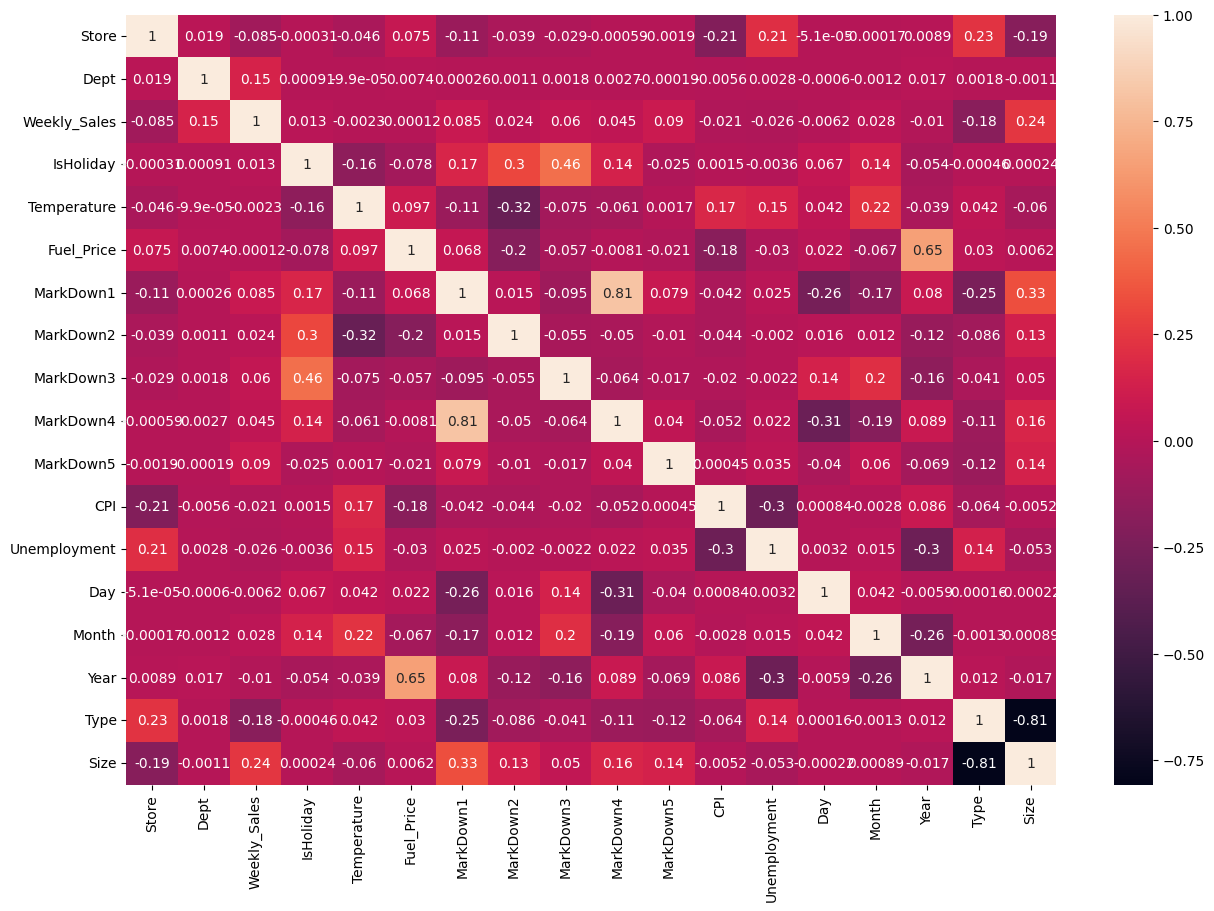

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

**After Prediction**

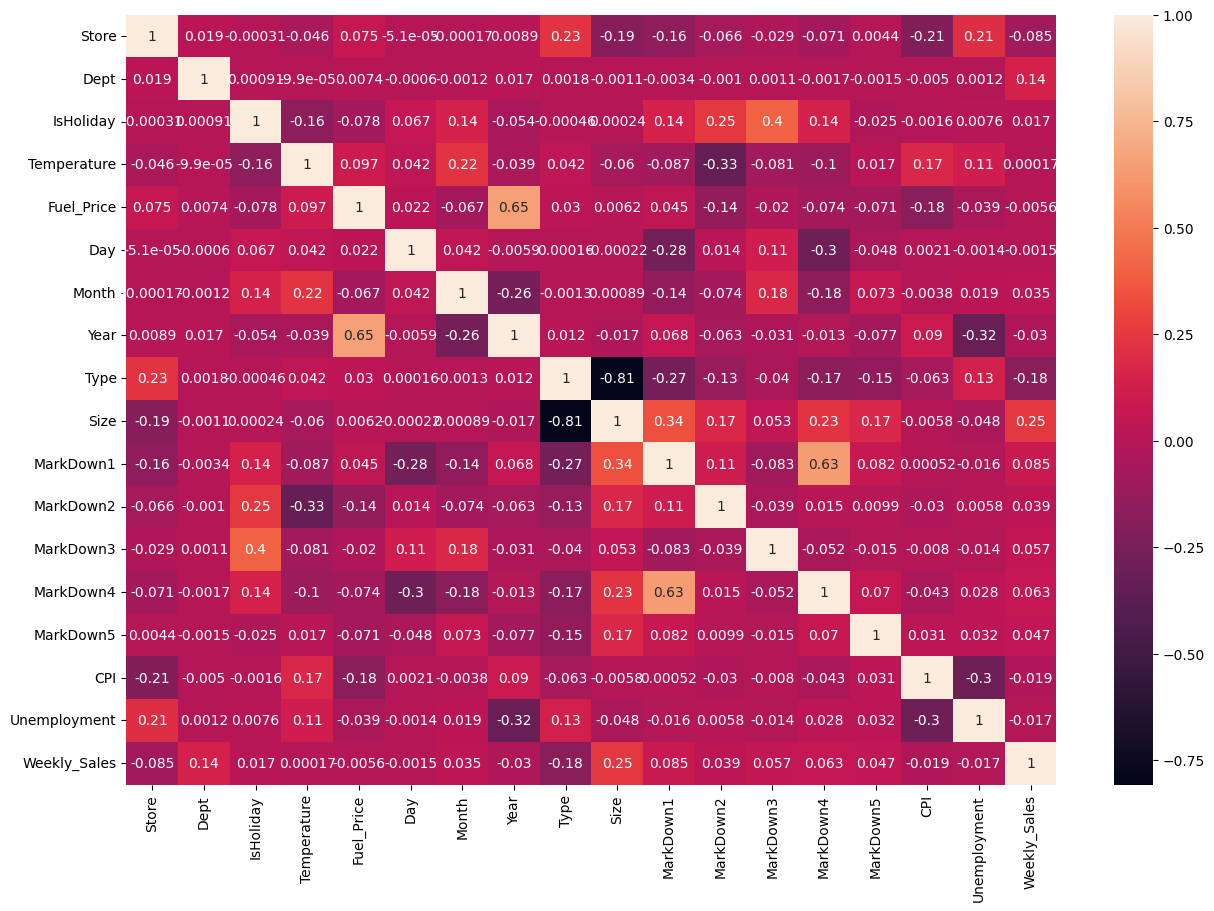

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **Summary Stats**

**Before Prediction**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000
Fuel_Price,551479.0,3.413010,0.427725,2.472,3.050000,3.524000,3.746000,4.468000
MarkDown1,280405.0,7369.403469,9439.253385,-2781.450,2014.470000,5011.720000,9264.480000,103184.980000
MarkDown2,207897.0,3489.575965,8920.862286,-265.760,74.240000,397.960000,2359.440000,104519.540000
MarkDown3,254619.0,1859.728572,11633.662079,-179.260,7.330000,41.390000,177.270000,149483.310000
MarkDown4,248649.0,3355.891061,6889.409946,0.220,319.190000,1202.440000,3380.280000,67474.850000


**After prediction**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.00000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.00000,74.000000,99.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.00000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.94000,73.160000,101.950000
Fuel_Price,551479.0,3.413010,0.427725,2.472,3.050000,3.52400,3.746000,4.468000
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.00000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.00000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.00000,2012.000000,2013.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.00000,2.000000,3.000000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.00000,202505.000000,219622.000000


# **Final Cleaned Dataset**

In [ ]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,24924.5000
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,50605.2700
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,13740.1200
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,39954.0400
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,32229.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,4392.5763
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,56064.7318
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,1094.3121
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,6337.4919


In [ ]:
df.dtypes

Store             int64
Dept              int64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
Day               int64
Month             int64
Year              int64
Type              int64
Size              int64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Weekly_Sales    float64
dtype: object

In [ ]:
df.to_csv('RFS_Cleaned_Dataset.csv',index=False)